# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sys.path.append(os.getcwd() + '/refi')
import retirement_analysis as ra
import constants
#import asset
#import consumption
#import inflation
import portfolio as pf

import series.base_series as base_series
from series.consumption import StaticRetirementConsumption
from series.ssb import StaticRetirementSSB
from series.deferral import StaticPreRetirementDeferral

# Constants

In [4]:
initial_balance = 400000
initial_cpi = 275
initial_age = 30
initial_deferral = 19500
retirement_age = 60
retirement_consumption = 75000
retirement_ssb = 10000
death_age = 100

In [5]:
num_years = death_age - initial_age + 1

In [6]:
geo_mean_equity_return = .065
geo_mean_bond_return = .035
geo_mean_cash_return = .002

geo_mean_inflation = .02


# Portfolio

In [74]:
equity = base_series.StaticSeries(num_years, geo_mean_equity_return)
bond = base_series.StaticSeries(num_years, geo_mean_bond_return)
cash = base_series.StaticSeries(num_years, geo_mean_cash_return)

In [75]:
assets = [equity, bond, cash]
balance = initial_balance
glidepath = constants.fidelity_glidepath

In [76]:
portfolio = pf.Portfolio(assets, glidepath, balance)

# Inflation Scenario

In [77]:
inflation = base_series.StaticSeries(num_years, geo_mean_inflation)

In [78]:
cpi = base_series.StaticGrowthSeries(initial_value=100, growth_series=inflation)

# Consumption Scenario

In [79]:
consumption = StaticRetirementConsumption(retirement_consumption, cpi, initial_age, retirement_age)

In [80]:
deferral = StaticPreRetirementDeferral(initial_deferral, cpi, initial_age, retirement_age)

In [81]:
ssb = StaticRetirementSSB(retirement_ssb, cpi, initial_age, retirement_age)

# Ret Analysis

In [82]:
retirement_analysis = ra.RetirementAnalysis(
    initial_age=initial_age,
    retirement_age=retirement_age,
    death_age=death_age,
    portfolio=portfolio,
    deferral_scenario=deferral,
    consumption_scenario=consumption,
    inflation_scenario=inflation,
    cpi_scenario=cpi,
    ssb_scenario=ssb)

In [86]:
retirement_analysis._step()

In [87]:
retirement_analysis.portfolio.history

array([400000.    , 445784.6163,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [85]:
retirement_analysis.portfolio.total_returns

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])

In [69]:
retirement_analysis.portfolio.allocations

array([0.9 , 0.09, 0.01])

In [117]:
retirement_analysis.portfolio.hist_pf_returns

array([0.06167, 0.06167])

In [118]:
retirement_analysis.portfolio.balance

493953.1840435499

In [124]:
ages = np.array([age for age in np.arange(retirement_analysis.initial_age, retirement_analysis.death_age + 1)])

In [125]:
ages

array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100])

In [144]:
start_age

30

In [145]:
c.num_periods

71

In [151]:
ages

array([30, 31])

In [152]:
c.history

array([100., 102.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan])

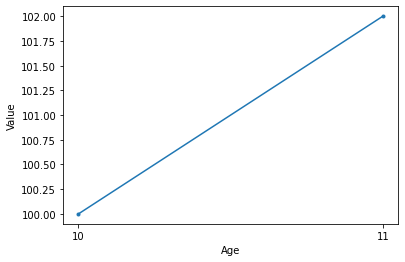

In [159]:
c.plot(initial_age=10)

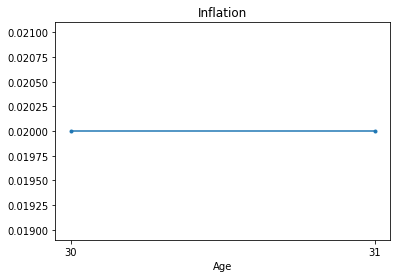

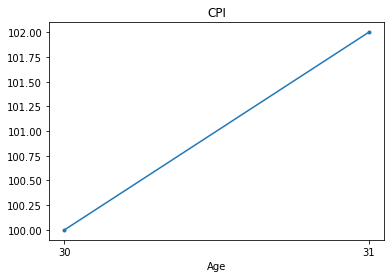

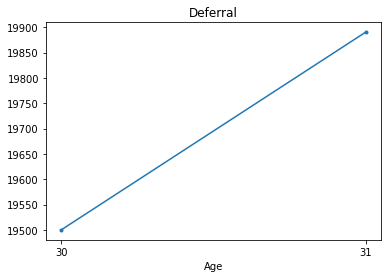

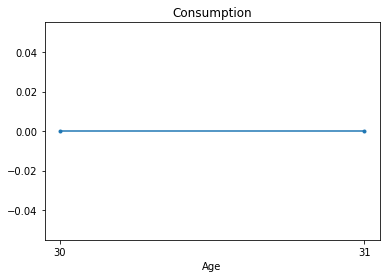

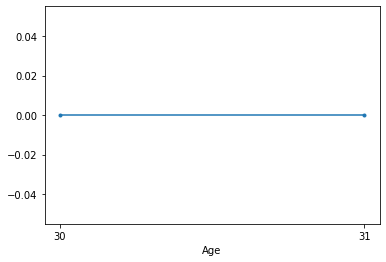

In [165]:
retirement_analysis.plot()